In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
breslow = pd.read_csv(r'data_set\breslow.csv', index_col=0)
breslow

,ID,Y1,Y2,Y3,Y4,Base,Age,Trt,Ysum,sumY,Age10,Base4
1,104,5,3,3,3,11,31,placebo,14,14,3.1,2.75
2,106,3,5,3,3,11,30,placebo,14,14,3.0,2.75
3,107,2,4,0,5,6,25,placebo,11,11,2.5,1.50
4,114,4,4,1,4,8,36,placebo,13,13,3.6,2.00
5,116,7,18,9,21,66,22,placebo,55,55,2.2,16.50
6,118,5,2,8,7,27,29,placebo,22,22,2.9,6.75
7,123,6,4,0,2,12,31,placebo,12,12,3.1,3.00
8,126,40,20,23,12,52,42,placebo,95,95,4.2,13.00
9,130,5,6,6,5,23,37,placebo,22,22,3.7,5.75
10,135,14,13,6,0,10,28,placebo,33,33,2.8,2.50


In [3]:
breslow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1 to 59
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      59 non-null     int64  
 1   Y1      59 non-null     int64  
 2   Y2      59 non-null     int64  
 3   Y3      59 non-null     int64  
 4   Y4      59 non-null     int64  
 5   Base    59 non-null     int64  
 6   Age     59 non-null     int64  
 7   Trt     59 non-null     object 
 8   Ysum    59 non-null     int64  
 9   sumY    59 non-null     int64  
 10  Age10   59 non-null     float64
 11  Base4   59 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ KB


In [4]:
breslow.describe()

,ID,Y1,Y2,Y3,Y4,Base,Age,Ysum,sumY,Age10,Base4
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,168.355932,8.949153,8.355932,8.440678,7.305085,31.220339,28.338983,33.050847,33.050847,2.833898,7.805085
std,50.075379,14.835214,10.187488,14.148561,9.649467,26.877158,6.301642,45.584111,45.584111,0.630164,6.719290
min,101.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,0.000000,1.800000,1.500000
25%,119.500000,2.000000,3.000000,2.000000,3.000000,12.000000,23.000000,11.500000,11.500000,2.300000,3.000000
50%,147.000000,4.000000,5.000000,4.000000,4.000000,22.000000,28.000000,16.000000,16.000000,2.800000,5.500000
75%,216.000000,10.500000,11.500000,8.000000,8.000000,41.000000,32.000000,36.000000,36.000000,3.200000,10.250000
max,238.000000,102.000000,65.000000,76.000000,63.000000,151.000000,42.000000,302.000000,302.000000,4.200000,37.750000


In [6]:
breslow.columns

Index(['ID', 'Y1', 'Y2', 'Y3', 'Y4', 'Base', 'Age', 'Trt', 'Ysum', 'sumY',
       'Age10', 'Base4'],
      dtype='object')

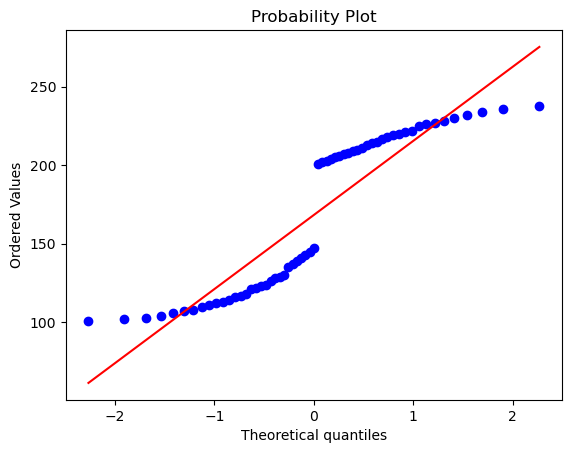

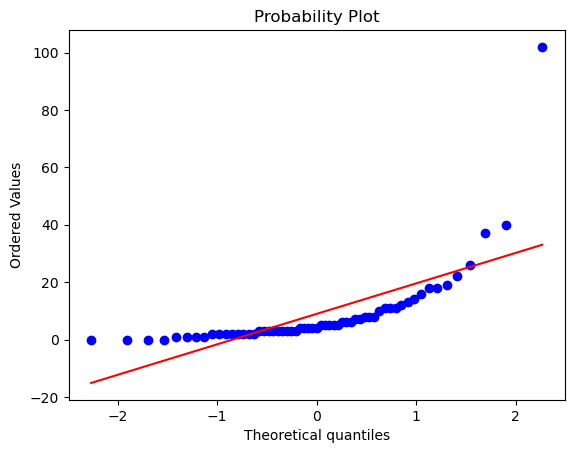

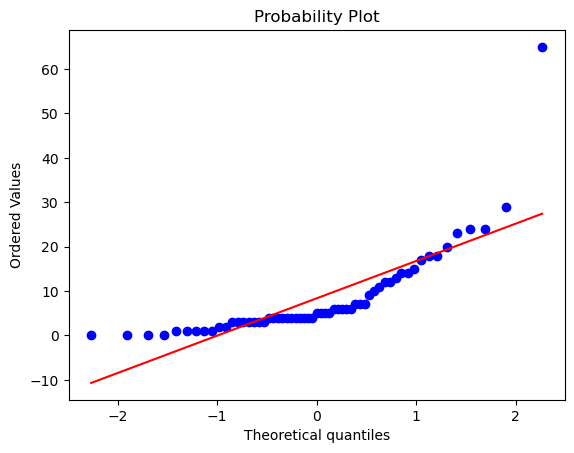

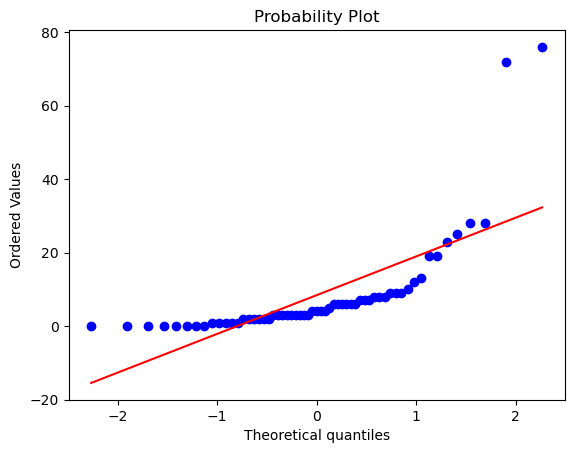

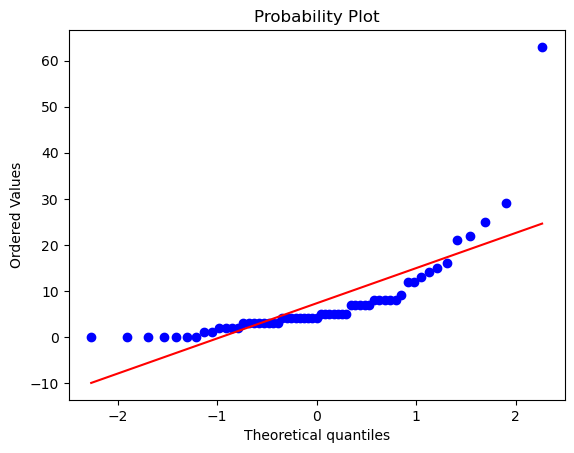

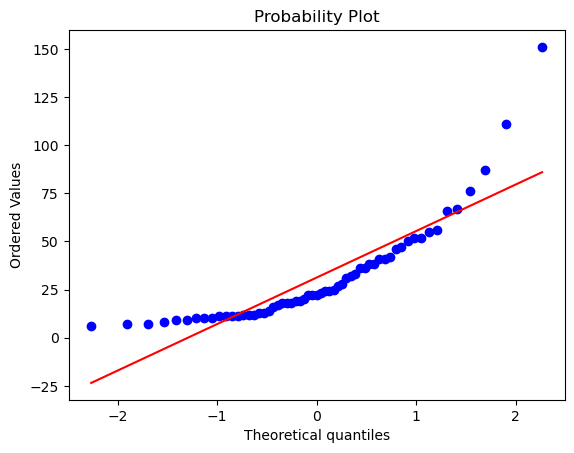

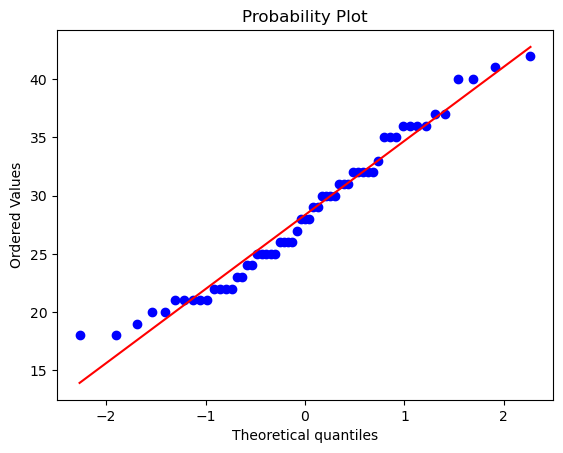

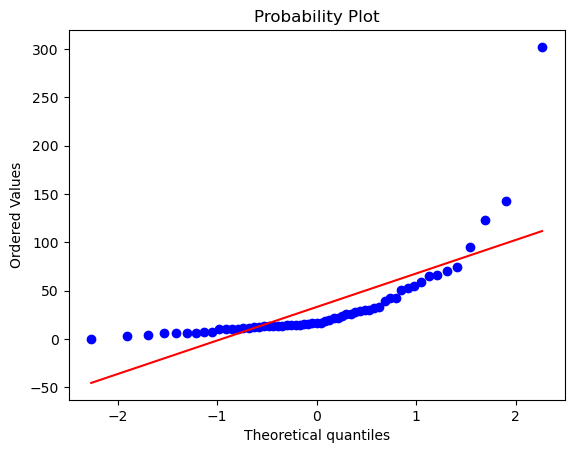

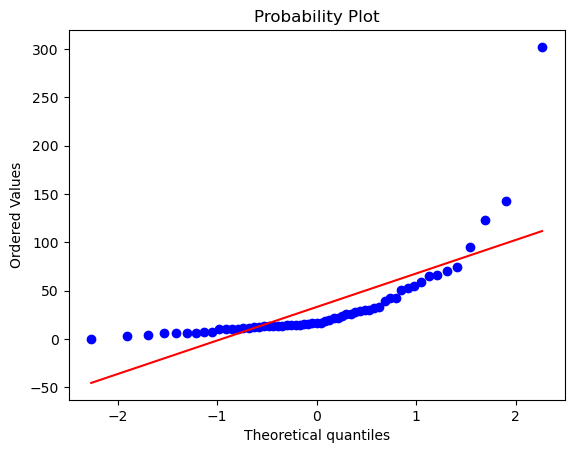

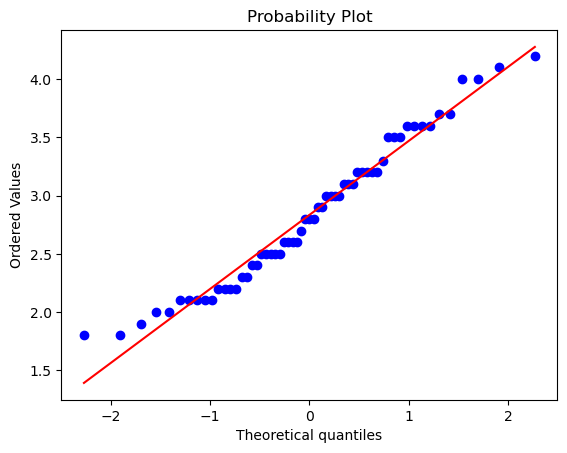

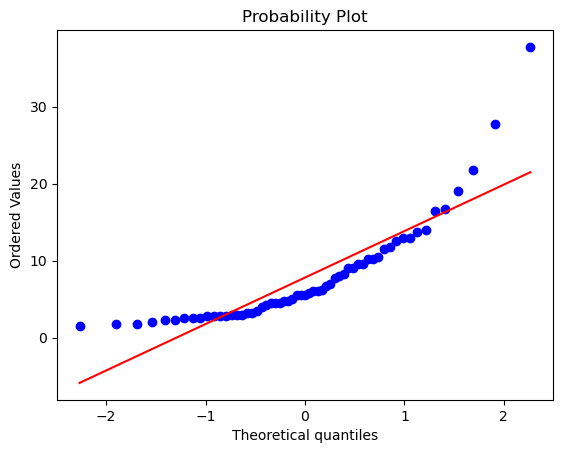

In [11]:
for col in breslow.columns.to_list():
    if breslow[col].dtype == 'object':
        continue
    else:
        df = breslow.loc[:, col].to_numpy()
        stats.probplot(df, dist='norm', plot=plt)
        plt.show()

In [12]:
for col in breslow.columns.to_list():
    if breslow[col].dtype == 'object':
        continue
    else:
        df = breslow.loc[:, col].to_numpy()
        t_statistics, p_value = stats.shapiro(df)
        print(col, t_statistics, p_value)

ID 0.8331722412971085 1.1864776326604027e-06
Y1 0.5106821123851363 9.899963398968955e-13
Y2 0.6675897937578339 2.764536264073538e-10
Y3 0.5430888164102378 2.8225636975864915e-12
Y4 0.6166326510696032 3.74696248533704e-11
Base 0.7794898701358833 5.202559294738707e-08
Age 0.9640477244008488 0.07870624416979778
Ysum 0.571178517798859 7.306036137132643e-12
sumY 0.571178517798859 7.306036137132643e-12
Age10 0.9640477244008486 0.0787062441697958
Base4 0.7794898701358833 5.202559294738707e-08
